In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation,Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense,Convolution2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rn

Using TensorFlow backend.


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
path=os.path.join('gdrive','My Drive','flowers')
path

'gdrive/My Drive/flowers'

In [0]:
x=[]
y=[]
img_size=150

In [0]:
def label_assignment(img,flower_type):
    return flower_type

In [0]:
def make_label(flower_type,directory):
    for img in tqdm(os.listdir(directory)):
        label=label_assignment(img,flower_type)
        path=os.path.join(directory,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(img_size,img_size))
        
        x.append(np.array(img))
        y.append(str(label))

In [0]:
daisy_path=path+'/daisy'
dandelion_path=path+'/dandelion'
rose_path=path+'/rose'
sunflower_path=path+'/sunflower'
tulip_path=path+'/tulip'

In [11]:
make_label('Daisy',daisy_path)

100%|██████████| 769/769 [06:29<00:00,  2.47it/s]


In [12]:
make_label('Dandelion',dandelion_path)

 94%|█████████▍| 994/1055 [07:25<00:23,  2.55it/s]

error: ignored

In [13]:
make_label('Rose',rose_path)


100%|██████████| 784/784 [05:49<00:00,  2.61it/s]


In [14]:
make_label('Sunflower',sunflower_path)


100%|██████████| 734/734 [06:47<00:00,  2.35it/s]


In [15]:
make_label('Tulip',tulip_path)


100%|██████████| 984/984 [08:09<00:00,  2.24it/s]


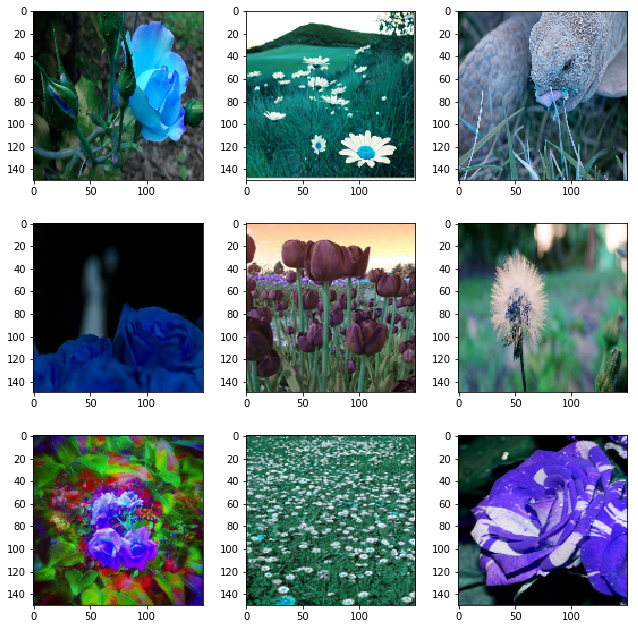

In [16]:
fig,ax=plt.subplots(3,3)
fig.set_size_inches(9,9)

for i in range(3):
    for j in range(3):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(x[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()

In [0]:
y=le.fit_transform(y)

In [0]:
categorical_y=to_categorical(y,5)

In [0]:
X=np.array(x)

In [0]:
X=X.astype('float32')

X=X/255.0

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,categorical_y,test_size=0.2)

In [23]:
x_train.shape

(3412, 150, 150, 3)

In [72]:
model=Sequential()

model.add(Convolution2D(16,3,3,activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,1,1,activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Convolution2D(32,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,1,1,activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,1,1,activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# model.add(Convolution2D(64,1,1, activation='relu'))
model.add(Convolution2D(5,11,11))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(150, 150,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

In [43]:
# model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))

# model.add(MaxPooling2D(2,2))
# # model.add(Convd2D(10,kernel_size=(1,1), activation='relu'))
# # model.add(Conv2D(32,kernel_size=(1,1), activation='relu'))

# model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))

# # model.add(MaxPooling2D(2,2))
# # model.add(Conv2D(32,kernel_size=(1,1),activation='relu'))

# # model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# # model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
# # model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
# # model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))


# model.add(Dropout(0.1))
# # model.add(Conv2D(5,kernel_size=(5,5)))
# model.add(Convolution2D(5, 5, 5))


# # model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# # model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
# # # model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
# # model.add(Conv2D(5,kernel_size=(8,8)))

# model.add(Flatten())
# # model.add(Activation('softmax'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(5,activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (5, 5))`


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_19 (Batc (None, 148, 148, 16)      64        
_________________________________________________________________
dropout_24 (Dropout)         (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 146, 146, 32)      4640      
_________________________________________________________________
batch_normalization_20 (Batc (None, 146, 146, 32)      128       
_________________________________________________________________
dropout_25 (Dropout)         (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 144, 144, 64)      18496     
__________

In [0]:
from keras.callbacks import LearningRateScheduler

In [0]:

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [77]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=15,callbacks=[LearningRateScheduler(scheduler, verbose=1)],verbose=1)

Train on 3412 samples, validate on 853 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
3412/3412 [==============================] - 35s 10ms/step - loss: 2.7116 - acc: 0.3426 - val_loss: 5.5259 - val_acc: 0.3458
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
3412/3412 [==============================] - 29s 9ms/step - loss: 2.0469 - acc: 0.4393 - val_loss: 2.3256 - val_acc: 0.5029
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
3412/3412 [==============================] - 29s 9ms/step - loss: 1.6943 - acc: 0.5079 - val_loss: 1.9470 - val_acc: 0.4642
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
3412/3412 [==============================] - 29s 9ms/step - loss: 1.5822 - acc: 0.5372 - val_loss: 1.7031 - val_acc: 0.4080
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
3412/3412 [======================

In [78]:
model.evaluate(x_test,y_test)

853/853 [==============================] - 2s 3ms/step


[1.3299011982898779, 0.5638921454740996]

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180) 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [80]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64), epochs = 25, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // 32, shuffle =True)

Epoch 1/25
106/106 [==============================] - 57s 535ms/step - loss: 1.4132 - acc: 0.5435 - val_loss: 1.3196 - val_acc: 0.5240
Epoch 2/25
106/106 [==============================] - 56s 525ms/step - loss: 1.1794 - acc: 0.5840 - val_loss: 1.2967 - val_acc: 0.5229
Epoch 3/25
106/106 [==============================] - 55s 523ms/step - loss: 1.1734 - acc: 0.5814 - val_loss: 1.1138 - val_acc: 0.5862
Epoch 4/25
106/106 [==============================] - 56s 525ms/step - loss: 1.1221 - acc: 0.6026 - val_loss: 1.1759 - val_acc: 0.5393
Epoch 5/25
106/106 [==============================] - 56s 525ms/step - loss: 1.0666 - acc: 0.6194 - val_loss: 1.1323 - val_acc: 0.5615
Epoch 6/25
106/106 [==============================] - 56s 528ms/step - loss: 1.0264 - acc: 0.6255 - val_loss: 1.0546 - val_acc: 0.6014
Epoch 7/25
106/106 [==============================] - 56s 525ms/step - loss: 1.0083 - acc: 0.6251 - val_loss: 1.0320 - val_acc: 0.5873
Epoch 8/25
106/106 [==============================] - 5

In [81]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=64), epochs = 10, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // 32, shuffle =True)

Epoch 1/10
106/106 [==============================] - 57s 541ms/step - loss: 0.6888 - acc: 0.7422 - val_loss: 0.7018 - val_acc: 0.7562
Epoch 2/10
106/106 [==============================] - 56s 525ms/step - loss: 0.6836 - acc: 0.7356 - val_loss: 0.7506 - val_acc: 0.7562
Epoch 3/10
106/106 [==============================] - 56s 525ms/step - loss: 0.6928 - acc: 0.7323 - val_loss: 0.7504 - val_acc: 0.7268
Epoch 4/10
106/106 [==============================] - 56s 525ms/step - loss: 0.6779 - acc: 0.7467 - val_loss: 0.7093 - val_acc: 0.7526
Epoch 5/10
106/106 [==============================] - 55s 522ms/step - loss: 0.6398 - acc: 0.7606 - val_loss: 0.9098 - val_acc: 0.7128
Epoch 6/10
106/106 [==============================] - 56s 524ms/step - loss: 0.6766 - acc: 0.7510 - val_loss: 0.7387 - val_acc: 0.7468
Epoch 7/10
106/106 [==============================] - 55s 523ms/step - loss: 0.6713 - acc: 0.7514 - val_loss: 0.6403 - val_acc: 0.7948
Epoch 8/10
106/106 [==============================] - 5

In [82]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=64), epochs = 5, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // 32, shuffle =True)

Epoch 1/5
106/106 [==============================] - 57s 538ms/step - loss: 0.6063 - acc: 0.7714 - val_loss: 0.7286 - val_acc: 0.7597
Epoch 2/5
106/106 [==============================] - 56s 524ms/step - loss: 0.6206 - acc: 0.7702 - val_loss: 0.7092 - val_acc: 0.7773
Epoch 3/5
106/106 [==============================] - 56s 524ms/step - loss: 0.6181 - acc: 0.7687 - val_loss: 0.6556 - val_acc: 0.7843
Epoch 4/5
106/106 [==============================] - 55s 520ms/step - loss: 0.5987 - acc: 0.7776 - val_loss: 0.6275 - val_acc: 0.7902
Epoch 5/5
106/106 [==============================] - 55s 522ms/step - loss: 0.5681 - acc: 0.7882 - val_loss: 0.7268 - val_acc: 0.7843


In [83]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=64), epochs = 5, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // 32, shuffle =True)

Epoch 1/5
106/106 [==============================] - 57s 534ms/step - loss: 0.6344 - acc: 0.7712 - val_loss: 0.6620 - val_acc: 0.7843
Epoch 2/5
106/106 [==============================] - 55s 523ms/step - loss: 0.5807 - acc: 0.7826 - val_loss: 0.6429 - val_acc: 0.7726
Epoch 3/5
106/106 [==============================] - 55s 523ms/step - loss: 0.5671 - acc: 0.7845 - val_loss: 0.6298 - val_acc: 0.7737
Epoch 4/5
106/106 [==============================] - 55s 522ms/step - loss: 0.5496 - acc: 0.7980 - val_loss: 0.5933 - val_acc: 0.8019
Epoch 5/5
106/106 [==============================] - 55s 522ms/step - loss: 0.5807 - acc: 0.7824 - val_loss: 0.6528 - val_acc: 0.7773
